# Classification Algorithms

1.Logistic regression

2.Naive-Bayes

3.Decision tree

4.Support Vector machines

# Importing Packages

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
 
    
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [9]:
data = pd.read_csv(r"C:/Users/DELL/Downloads/mobile_price_classification.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
df = data.copy()
df.drop(columns='n_cores',inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   pc             2000 non-null   int64  
 10  px_height      2000 non-null   int64  
 11  px_width       2000 non-null   int64  
 12  ram            2000 non-null   int64  
 13  sc_h           2000 non-null   int64  
 14  sc_w           2000 non-null   int64  
 15  talk_time      2000 non-null   int64  
 16  three_g        2000 non-null   int64  
 17  touch_screen   2000 non-null   int64  
 18  wifi    

# Data Cleansing

<AxesSubplot:>

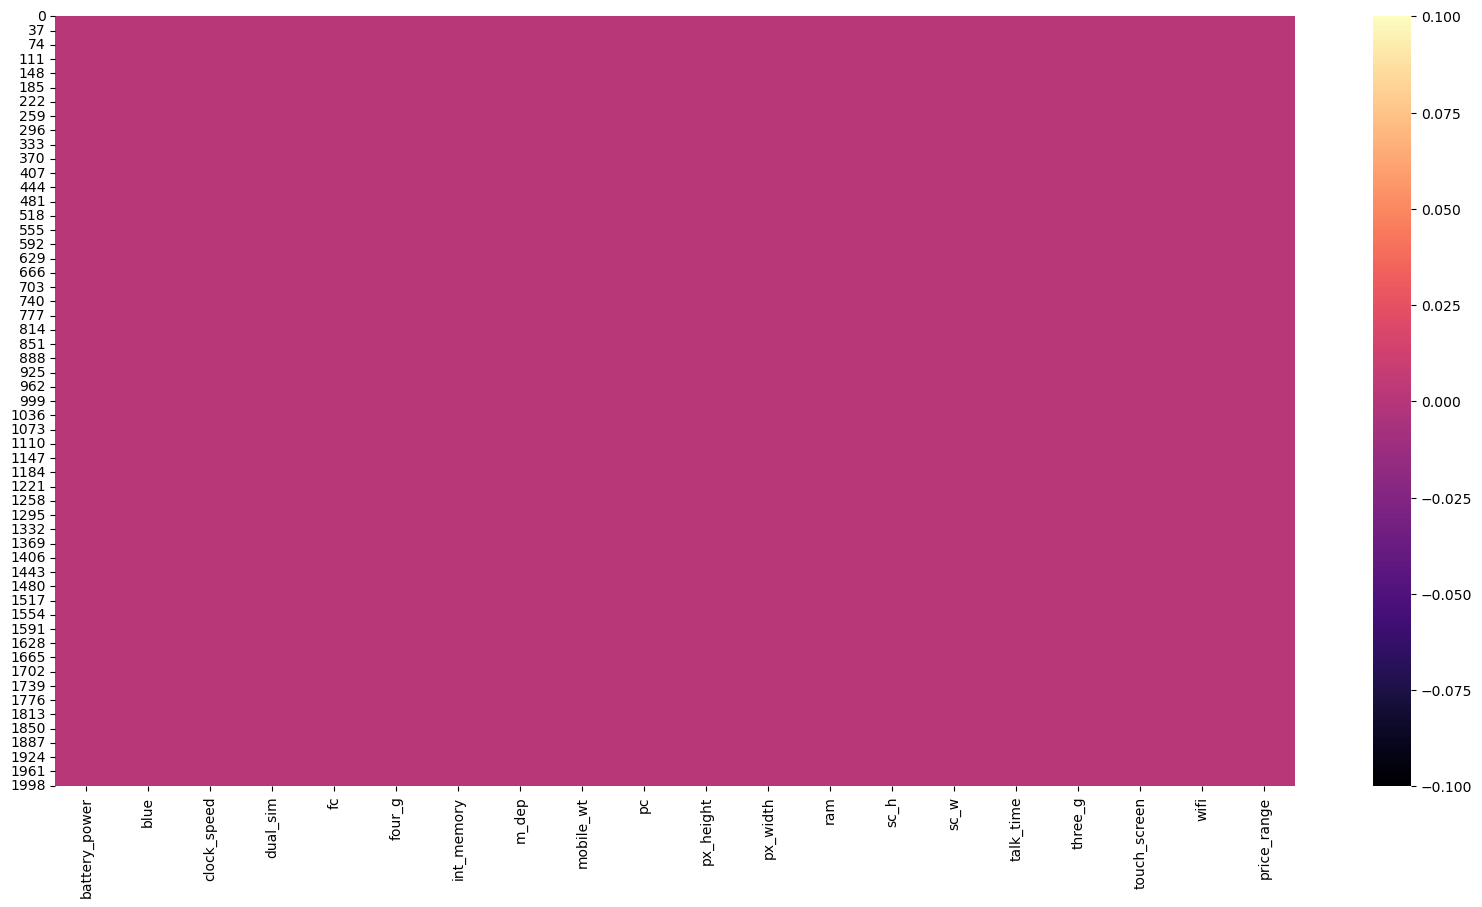

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cmap="magma")

<AxesSubplot:>

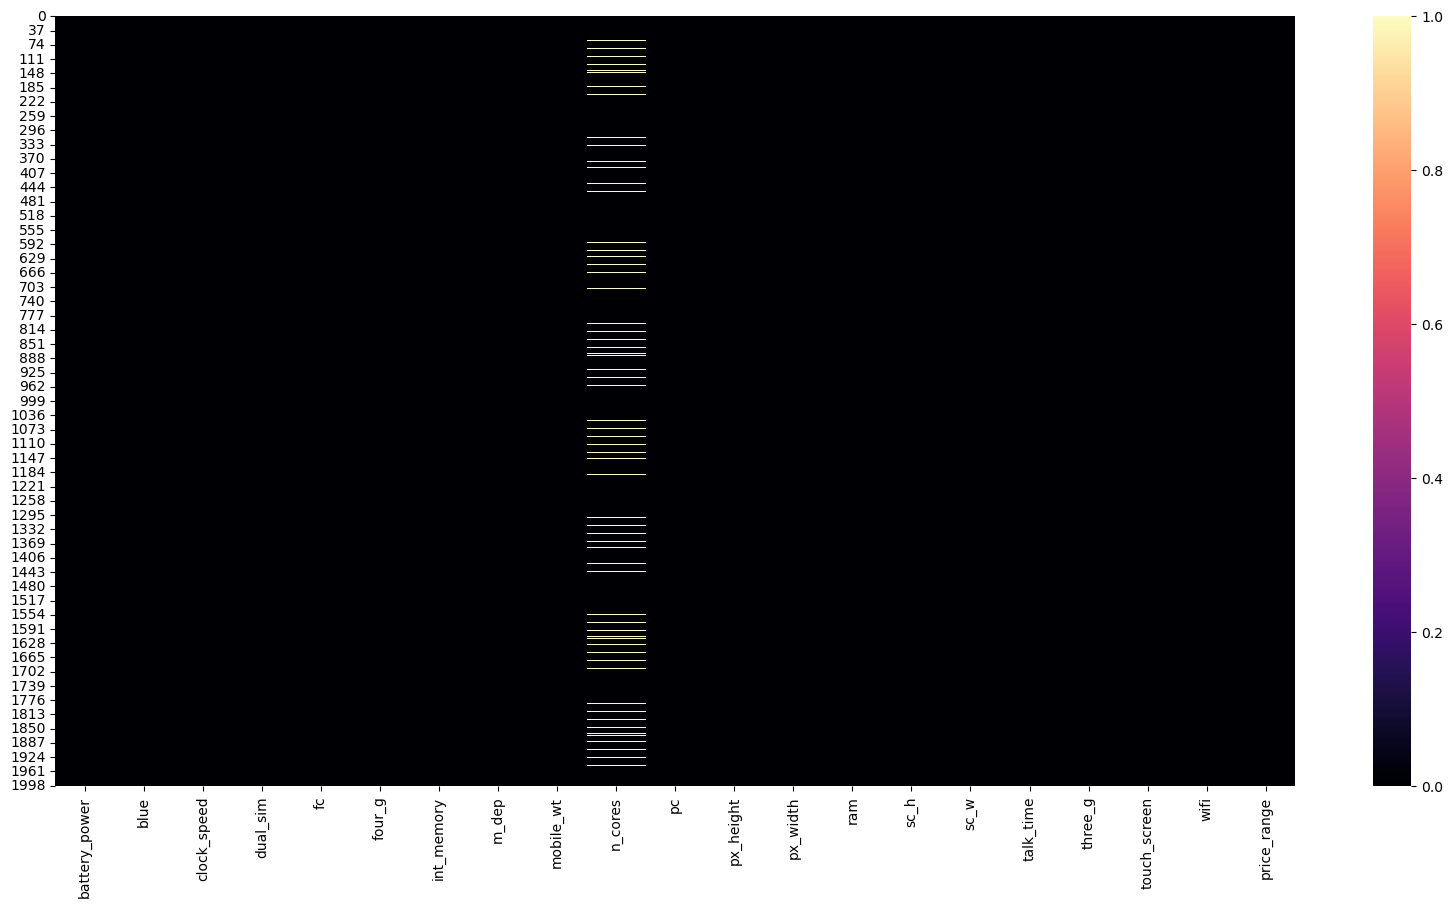

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(),cmap="magma")

# Data Processing

feature :- battery_power


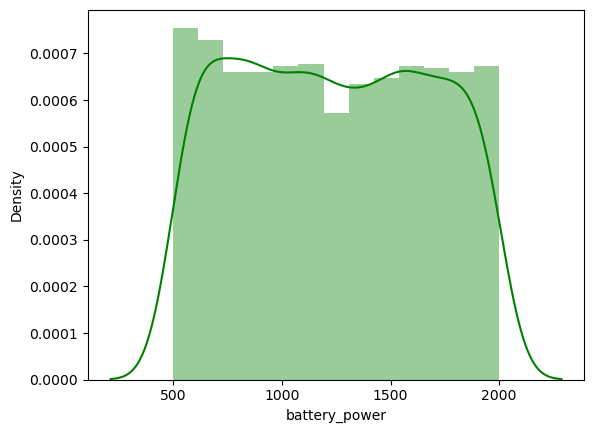

feature :- blue


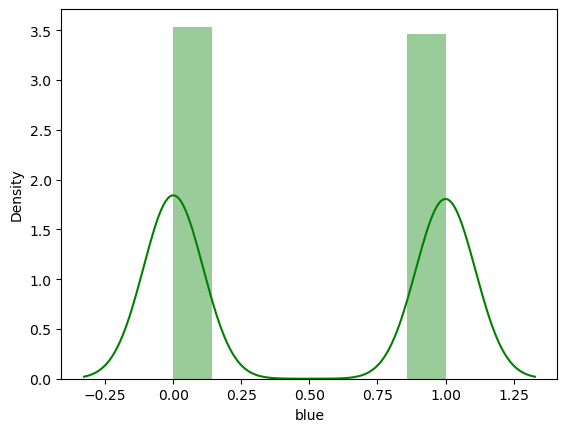

feature :- clock_speed


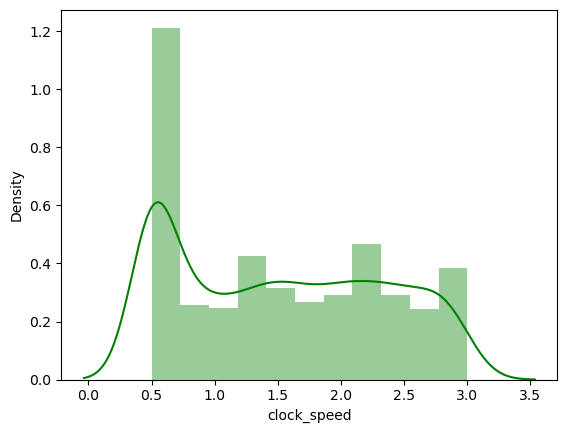

feature :- dual_sim


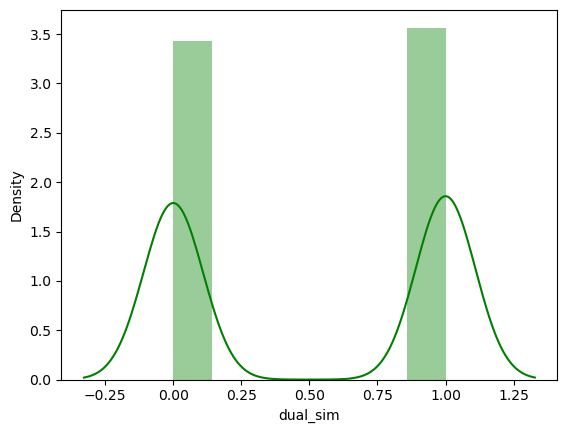

feature :- fc


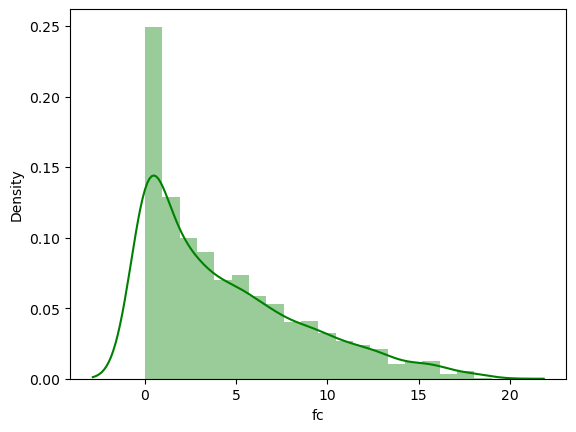

feature :- four_g


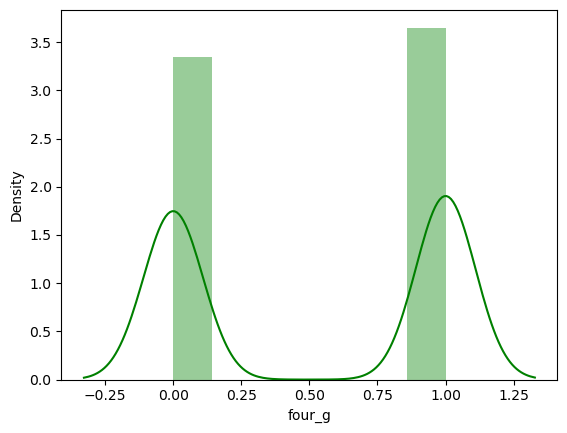

feature :- int_memory


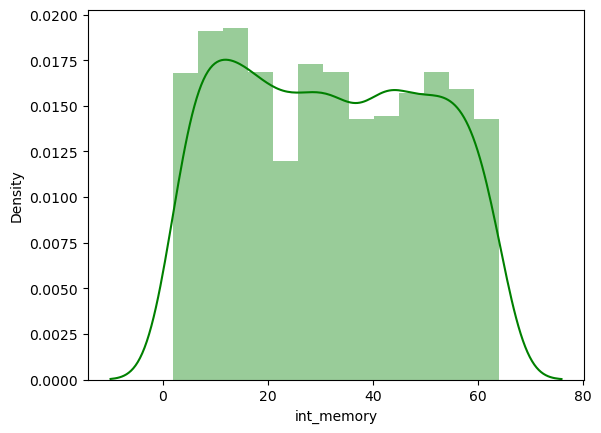

feature :- m_dep


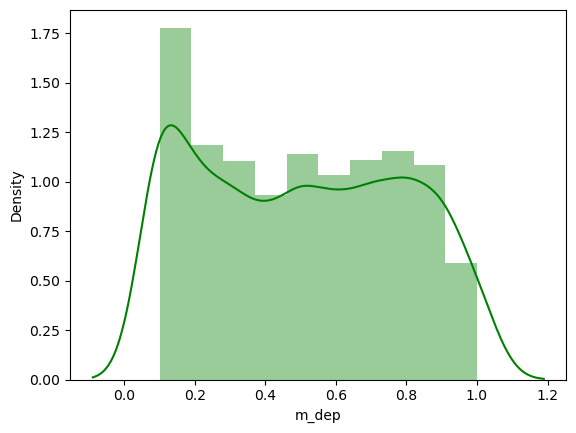

feature :- mobile_wt


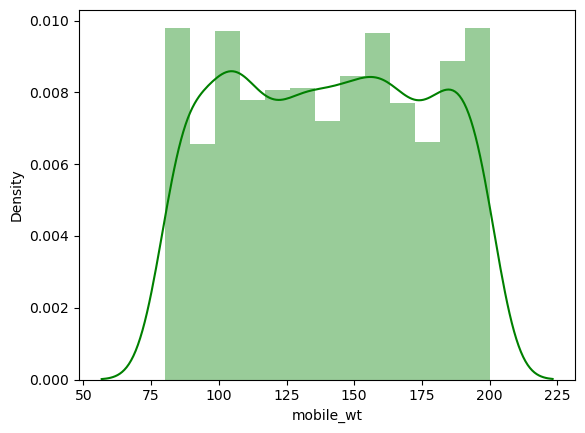

feature :- pc


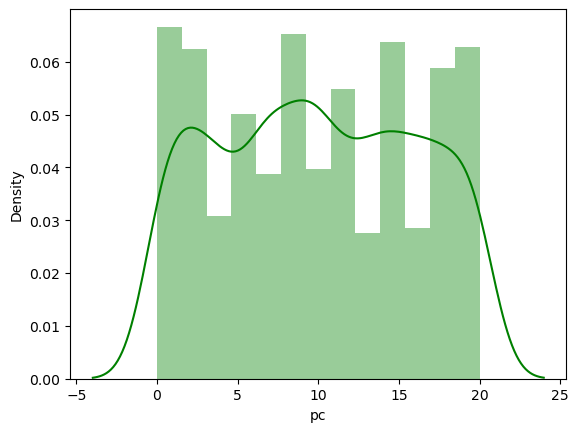

feature :- px_height


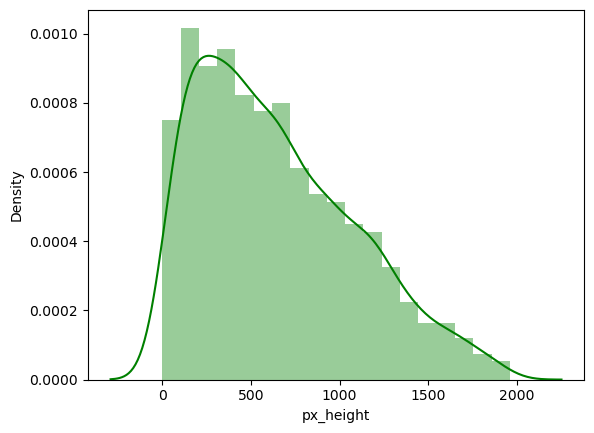

feature :- px_width


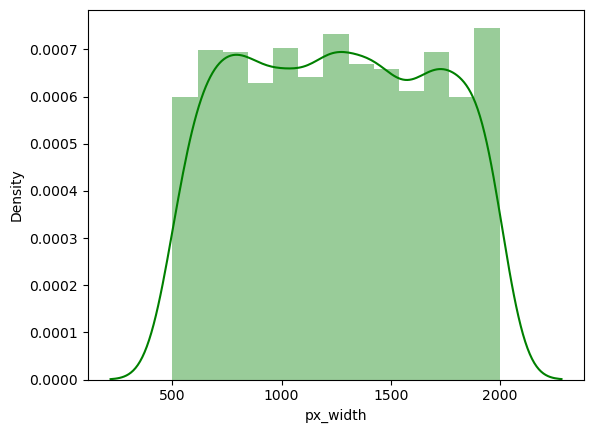

feature :- ram


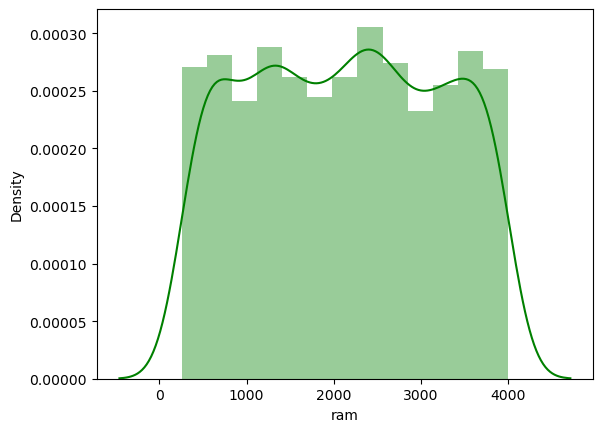

feature :- sc_h


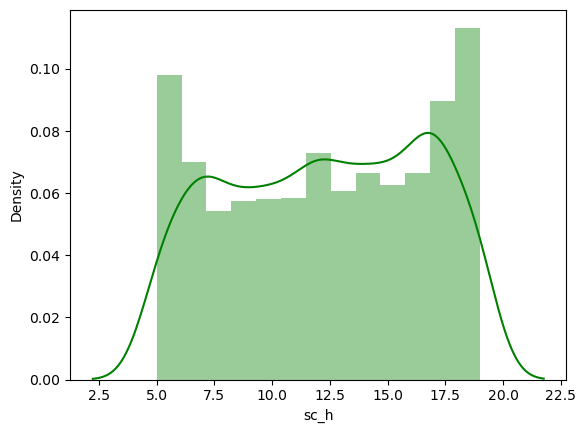

feature :- sc_w


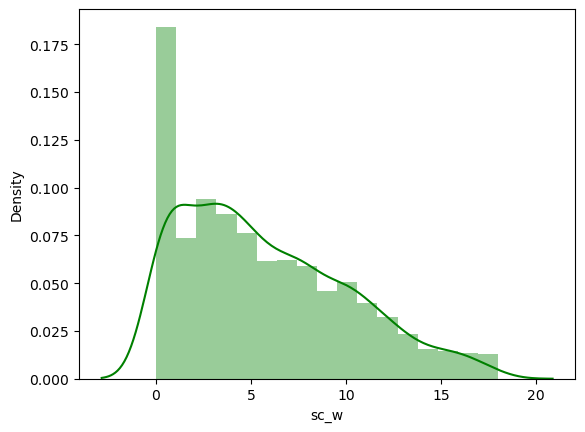

feature :- talk_time


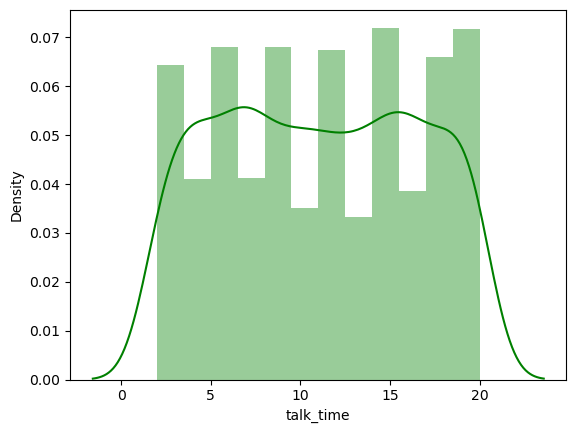

feature :- three_g


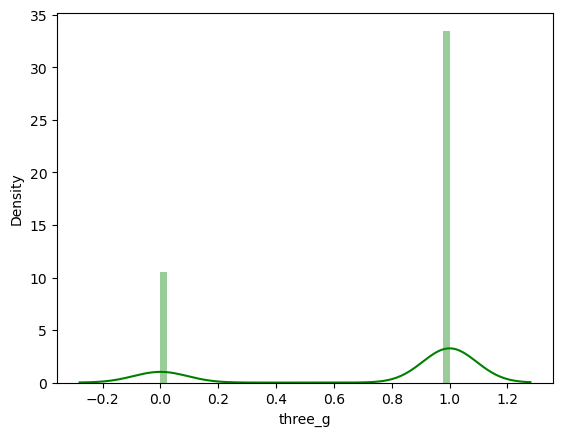

feature :- touch_screen


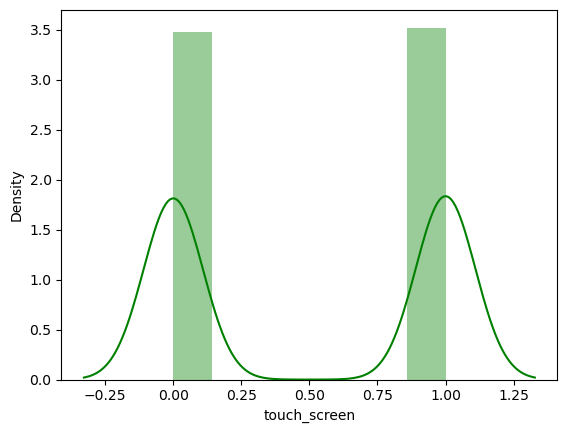

feature :- wifi


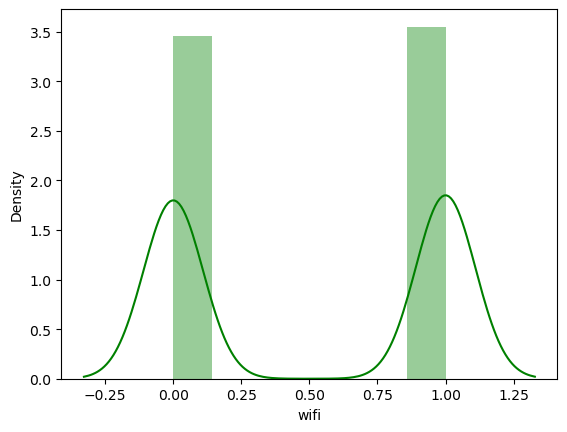

feature :- price_range


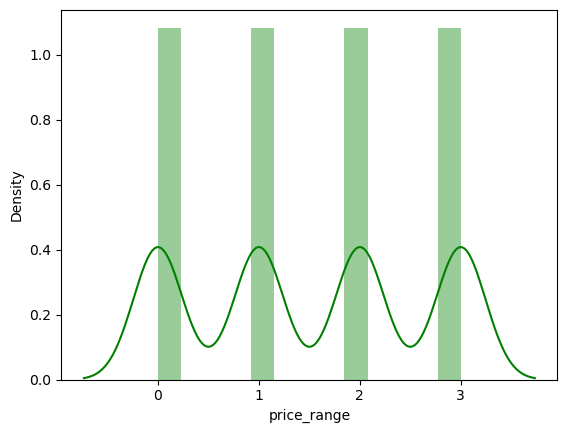

In [14]:
for i in df.columns:
    print("feature :-",i)
    sns.distplot(df[i],color='g')
    plt.show()

# Feature Scaling

In [15]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

Normalization

In [17]:
std= StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

# Logistic Regression

In [18]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred1 = log_reg.predict(x_test)
y_pred1

array([3, 3, 2, 3, 1, 3, 3, 3, 1, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 2, 3, 2,
       0, 1, 0, 0, 2, 3, 1, 1, 2, 0, 3, 2, 2, 2, 1, 1, 2, 0, 3, 2, 2, 0,
       1, 3, 1, 0, 1, 2, 1, 3, 2, 2, 2, 3, 2, 3, 0, 0, 1, 1, 0, 0, 2, 0,
       2, 1, 1, 3, 2, 2, 1, 1, 3, 1, 3, 3, 2, 1, 2, 0, 0, 0, 0, 3, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 0, 1, 0, 1, 3, 0, 1, 1, 1, 3, 2, 1, 2, 2,
       2, 0, 3, 1, 1, 1, 1, 1, 3, 0, 1, 0, 3, 2, 1, 3, 0, 3, 2, 0, 3, 3,
       3, 1, 2, 0, 0, 3, 3, 1, 3, 0, 3, 2, 0, 3, 3, 1, 2, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 2, 1, 1, 2, 3, 2, 1, 2, 0, 1, 1, 1, 3, 3, 3, 2, 0, 2,
       3, 2, 2, 2, 1, 2, 2, 2, 3, 0, 2, 3, 0, 2, 0, 2, 1, 3, 2, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 2, 2, 1, 2, 2, 1, 2, 1, 1, 3, 2, 0, 3, 1, 2, 1,
       3, 1, 0, 3, 0, 1, 2, 2, 1, 0, 1, 1, 0, 3, 0, 1, 0, 2, 0, 3, 1, 2,
       0, 1, 1, 2, 2, 3, 0, 3, 2, 1, 0, 3, 2, 1, 2, 1, 0, 3, 3, 1, 1, 1,
       3, 2, 3, 0, 2, 2, 2, 2, 0, 3, 0, 3, 1, 1, 2, 0, 3, 3, 0, 1, 1, 1,
       3, 0, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 3, 1,

Min-Max Scaler


In [19]:
mm = MinMaxScaler()

x_train2 = mm.fit_transform(x_train)
x_test2 = mm.transform(x_test)
x_train2

array([[0.96392786, 0.        , 0.04      , ..., 1.        , 0.        ,
        1.        ],
       [0.3747495 , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.38744155, 1.        , 0.8       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.85437542, 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.59786239, 0.        , 0.4       , ..., 1.        , 1.        ,
        1.        ],
       [0.0761523 , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [20]:

log_reg.fit(x_train2,y_train)
y_pred2 = log_reg.predict(x_test2)
y_pred2

array([3, 3, 1, 3, 1, 3, 3, 2, 1, 3, 2, 3, 0, 1, 0, 3, 1, 3, 2, 2, 3, 2,
       0, 1, 0, 0, 2, 3, 1, 1, 2, 0, 3, 2, 2, 2, 1, 0, 2, 0, 3, 2, 2, 0,
       1, 3, 1, 0, 1, 2, 1, 3, 2, 3, 2, 3, 2, 3, 0, 0, 1, 1, 0, 0, 2, 0,
       2, 1, 2, 3, 2, 2, 0, 1, 3, 1, 3, 3, 2, 1, 3, 0, 0, 0, 0, 3, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 0, 1, 0, 1, 3, 0, 1, 1, 1, 3, 2, 0, 2, 2,
       1, 0, 3, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3, 0, 3, 1, 0, 3, 2,
       3, 1, 3, 0, 0, 3, 3, 1, 3, 0, 3, 3, 0, 3, 3, 1, 2, 0, 1, 0, 0, 2,
       1, 1, 0, 0, 2, 1, 1, 2, 3, 3, 1, 2, 0, 1, 1, 1, 3, 3, 3, 2, 0, 2,
       3, 2, 2, 2, 1, 2, 1, 2, 3, 0, 1, 3, 0, 2, 0, 2, 1, 3, 2, 0, 0, 0,
       0, 3, 0, 3, 3, 3, 2, 1, 1, 2, 2, 1, 2, 1, 1, 3, 2, 0, 3, 1, 2, 1,
       3, 1, 0, 3, 0, 0, 2, 2, 1, 0, 1, 1, 0, 3, 0, 1, 0, 2, 0, 3, 1, 2,
       0, 1, 0, 2, 2, 3, 0, 3, 2, 1, 0, 3, 2, 1, 2, 1, 0, 3, 3, 1, 1, 1,
       3, 2, 3, 0, 2, 2, 2, 2, 0, 3, 0, 3, 1, 1, 2, 0, 3, 3, 0, 1, 1, 1,
       3, 0, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 3, 1,

In [21]:
accuracy_score(y_test,y_pred2)

0.904

# Naive-Bayes

GridSearchCV

In [22]:

params_grid = {'var_smoothing':np.logspace(0,-9,num=100)}
grid = GridSearchCV(estimator=GaussianNB(),param_grid=params_grid,cv=10)
grid.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [23]:
print("Best Parameters : ",grid.best_params_)
print("Best score/accuracy : ",grid.best_score_)

Best Parameters :  {'var_smoothing': 0.1}
Best score/accuracy :  0.8193333333333334


RandomisedSearchCV

In [24]:
grid = RandomizedSearchCV(estimator=GaussianNB(),param_distributions=params_grid,cv=10)
grid.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=GaussianNB(),
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [25]:
print("Best Parameters : ",grid.best_params_)
print("Best score/accuracy : ",grid.best_score_)

Best Parameters :  {'var_smoothing': 0.01873817422860384}
Best score/accuracy :  0.8093333333333333


# Support Vector Machines

GridSearchCV

In [26]:
parameter = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','polynomial','gausian','linear']}
grid = GridSearchCV(SVC(), parameter, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.257 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.257 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.253 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.253 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.253 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=1, kernel=gausian;, score=nan total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=1, kernel=gaus

[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.257 total time=   0.1s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.250 total time=   0.2s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.253 total time=   0.1s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.253 total time=   0.2s
[CV 1/5] END .....C=1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END .....C=1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END .....C=1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END .....C=1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END .....C=1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END ........C=1, gamma=1, kernel=gausian;, score=nan total time=   0.0s
[CV 2/5] END ........C=1, gamma=1, kernel=gausian;, score=nan total time=   0.0s
[CV 3/5] END ........C=1, gamma=1, kernel=gausian;, score=nan total time=   0.0s
[CV 4/5] END ........C=1, ga

[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.263 total time=   0.1s
[CV 1/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END .......C=10, gamma=1, kernel=gausian;, score=nan total time=   0.0s
[CV 2/5] END .......C=10, gamma=1, kernel=gausian;, score=nan total time=   0.0s
[CV 3/5] END .......C=10, gamma=1, kernel=gausian;, score=nan total time=   0.0s
[CV 4/5] END .......C=10, gamma=1, kernel=gausian;, score=nan total time=   0.0s
[CV 5/5] END .......C=10, gamma=1, kernel=gausian;, score=nan total time=   0.0s
[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.973 total time=   0.0s
[CV 2/5] END ......C=10, gam

[CV 1/5] END .....C=100, gamma=1, kernel=linear;, score=0.967 total time=   0.2s
[CV 2/5] END .....C=100, gamma=1, kernel=linear;, score=0.947 total time=   0.3s
[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.957 total time=   0.1s
[CV 4/5] END .....C=100, gamma=1, kernel=linear;, score=0.950 total time=   0.2s
[CV 5/5] END .....C=100, gamma=1, kernel=linear;, score=0.950 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.1s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.817 total time=   0.1s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.1s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.823 total time=   0.1s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.827 total time=   0.1s
[CV 1/5] END .C=100, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END .C=100, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END .C=100, gamma=0

[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.947 total time=   0.3s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.957 total time=   0.2s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.957 total time=   0.6s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.947 total time=   1.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.817 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.823 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.827 total time=   0.1s
[CV 1/5] END C=1000, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END C=1000, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END C=1000, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END C=1000, gamma=0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'polynomial', 'gausian', 'linear']},
             verbose=3)

In [27]:
print("Best Parameters :",grid.best_params_)
print("Best Accuracy : ",grid.best_score_)

Best Parameters : {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best Accuracy :  0.9613333333333334


RandomizedSearhCV

In [28]:
grid = RandomizedSearchCV(SVC(), parameter, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.973 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.950 total time=   0.0s
[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.973 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.953 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.957 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.0001, kernel=gausian;, score=nan total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.0001, kernel=gausian;, score=nan total time=   0.0s
[CV 3/5] END ..C=10, gamma=0.0001, kernel=gausian;, score=nan total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.0001, kernel=gausian;, score=nan total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.0001, kernel=gausian;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.001, kernel=polynom

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'polynomial',
                                                   'gausian', 'linear']},
                   verbose=3)

In [29]:
print("Best Parameters :",grid.best_params_)
print("Best Accuracy : ",grid.best_score_)

Best Parameters : {'kernel': 'linear', 'gamma': 0.0001, 'C': 10}
Best Accuracy :  0.9613333333333334


# Decision-Tree

In [30]:
max_depth = np.arange(1, 21)
min_samples_leaf = [1,5,10,15,20,30,25,35,40,50,60,70,100]

In [34]:
parameter_t = [{'criterion': ['entropy', 'gini'], 'max_depth': max_depth},
              {'min_samples_leaf': min_samples_leaf}]

GridSearchCV

In [35]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = parameter_t, cv=10)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
                         {'min_samples_leaf': [1, 5, 10, 15, 20, 30, 25, 35, 40,
                                               50, 60, 70, 100]}])

In [37]:
print("Best Parameters :" ,grid.best_params_)

Best Parameters : {'min_samples_leaf': 10}


In [38]:
print("Best Score",grid.best_score_)

Best Score 0.8473333333333335


RandomizedSearchCV

In [39]:
rgrid = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=parameter, cv=10)
rgrid.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions=[{'criterion': ['entropy', 'gini'],
                                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
                                        {'min_samples_leaf': [1, 5, 10, 15, 20,
                                                              30, 25, 35, 40,
                                                              50, 60, 70,
                                                              100]}])

In [40]:
print("Best Parameters :" ,rgrid.best_params_)
print("Best Score",grid.best_score_)

Best Parameters : {'max_depth': 6, 'criterion': 'entropy'}
Best Score 0.8473333333333335
